In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

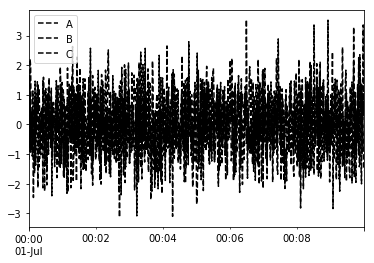

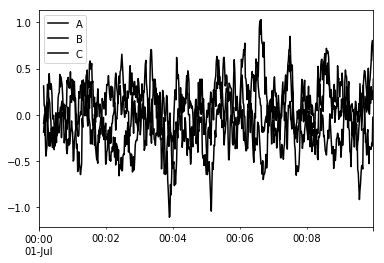

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [4]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\Ashima\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.068381,-0.457855,1.090563
2016-07-01 00:00:02,0.326572,0.551947,0.894112
2016-07-01 00:00:03,-0.053838,0.981179,0.360878
2016-07-01 00:00:04,0.037232,0.764513,0.209782
2016-07-01 00:00:05,-0.161252,0.572864,0.268622
2016-07-01 00:00:06,-0.250474,0.234908,0.164371
2016-07-01 00:00:07,-0.299243,0.140886,0.348485
2016-07-01 00:00:08,-0.337138,-0.324511,0.329968
2016-07-01 00:00:09,-0.196994,-0.358066,0.263120


In [5]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [6]:
df.head()

,A,B,C,D
2016-06-06,0.273437,-2.112372,1.124112,0.686278
2016-06-07,-0.562451,1.759288,0.091487,-2.418039
2016-06-08,-0.293801,0.527576,-1.588262,-1.369257
2016-06-09,-0.658329,-0.906570,-2.649760,-1.208693
2016-06-10,0.182692,1.787280,-0.199568,-1.762205


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DD097F52E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002DD0986F358>], dtype=object)

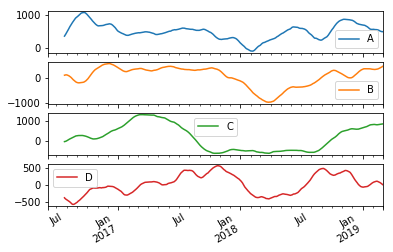

In [7]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [8]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.606964,1.439391,1.627194,1.810295


In [9]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.007789,-1.232728,1.169856,-0.522741
2016-06-08,-0.199465,-0.763655,0.655683,-1.382167
2016-06-09,-0.459885,-0.755761,-0.263844,-2.114053
2016-06-10,-0.579598,-0.393568,-0.855473,-2.905626


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

#less stable since the data is not static
#depends on if there is baseline that is to be tracked, or if this is intended to be a continuous montiored data set

In [ ]:
# EWMA
# Why use EWMA?

#helps to reduce noise

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting